In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix
import re 
import ast
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Frequency

In [14]:
# Define the file path for human ratings dataset
human_ratings_path = "../../data/explica/explica_freq_4800.tsv"

# Load the human ratings dataset into a pandas DataFrame
human_ratings = pd.read_csv(human_ratings_path, sep=",")
# Sort the dataset based on multiple columns to ensure a consistent order
# Sorting by 'pair_id', 'Sentence_A', 'Sentence_B', 'tested_relation', and 'tested_order'
# helps in maintaining consistency for further analysis
human_ratings = human_ratings.sort_values(by=['pair_id', 'Sentence_A', 'Sentence_B', 'tested_relation', 'tested_order'])



# Replace freq cat with freq labels
freq_map = {
'1_rare': 'Rare',
'2_uncommon': 'Uncommon',
'3_common': 'Common',
'4_frequent': 'Frequent',
}

# Creation of columns with predicted order and type of relation by models
human_ratings["freq_cat"] = human_ratings["freq_cat"].map(freq_map)


condition_human,"Causal-A,B","Causal-B,A","Temporal-A,B","Temporal-B,A",Unrelated
freq_cat,,,,,
Rare,214,241,239,164,303
Uncommon,244,244,295,174,282
Common,173,205,272,169,380
Frequent,189,186,234,149,443


None


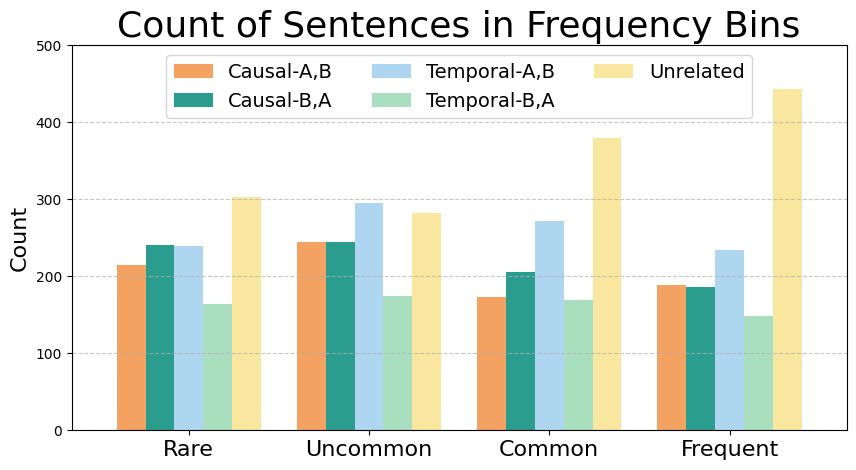

In [15]:

# Ensure freq_cat follows the desired order
category_order = ["Rare", "Uncommon", "Common", "Frequent"]
human_ratings["freq_cat"] = pd.Categorical(human_ratings["freq_cat"], categories=category_order, ordered=True)

# Count occurrences of each (freq_cat, Condition) pair
count_df = human_ratings.groupby(["freq_cat", "condition_human"]).size().unstack(fill_value=0)
print(display(count_df))

# Define colors for the bars
light_colors = ['#F4A261','#2A9D8F',"#AED6F1", "#A9DFBF", "#F9E79F"]

# Reorder the DataFrame based on the categorical freq_cat order
count_df = count_df.reindex(category_order)

# Plot grouped bar chart
ax = count_df.plot(kind="bar", figsize=(10, 5), width=0.8, color=light_colors)

# Labels and formatting
plt.xlabel("Frequency Category", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Count of Sentences in Frequency Bins", fontsize=26) #\nAccording to their Verbs and Connectives Co-occurrence
plt.xticks(rotation=0, fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xlabel("")
plt.ylim(0, 500)
plt.legend(loc='upper center', ncols=3, fontsize=14)

# Show plot
plt.show()
